# 1 Objetivo
Implementar el modelo de árbol de clasificación con datos relacionados a una condición de salud de las personas para predecir anomalías de corazón y evaluar la exactitud del modelo mediante la matriz de confusión.

# 2 Descripción
Se cargan librerías y se descargan los datos: https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/heart_2020_cleaned.csv

Los datos están relacionados con aspectos médicos y son valores numéricos de varias variables que caracterizan el estado de salud de 319,795 personas.

Se construye un modelo supervisado basado en el algoritmo de árbol de clasificación para resolver la tarea de clasificación binaria e identificar si una persona padece del corazón o no.

Se construyen datos de entrenamiento y validación al 80% y 20% cada uno.

Se desarrollan los modelos en Python de:

Regresión Logística binaria

Árbol de Clasificación tipo class

K Means

SVM Lineal

SVM Polinomial

SVM Radial

Los modelo se aceptan si tienen un valor de exactitud (accuracy) por encima del 70%..

# 3 Fundamento teórico
Los árboles de clasificación son el subtipo de árboles de predicción que se aplica cuando la variable respuesta dependiente es de tipo categórica o cualitativa y que tiene un significado conforme o de acuerdo a una etiqueta.(Amat Rodrigo 2017)

(Amat Rodrigo 2020)

La etiqueta puede ser ‘BUENO’ o ‘MALO’; ‘0’ o ‘1’; ‘ALTO’ O ‘BAJO’; ‘ENFERMO, ’NO ENFERMO’; entre otros ejemplos.

# 4 Desarrollo
## 4.1 Cargar librerías
Algunas librerías son nuevas, hay que instalarlas desde R, aquí se indican cuáles librerías y con comentario dado que ya se instalaron previamente.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Estadísticas
import scipy 
from scipy import stats

# Para partir datos entrenamiento y validación
from sklearn.model_selection import train_test_split

# Modelo de Clasificación 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

## 4.2 Cargar los datos
Se cargan datos del enlace URL, se observan los primeros y últimos registros del conjunto de datos.

In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/heart_2020_cleaned.csv")
datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## 4.3 Exploración de datos
Son 319795 observaciones y 18 variables



In [3]:
print("Observaciones y variables: ", datos.shape)

Observaciones y variables:  (319795, 18)


In [4]:
print("Columnas y tipo de dato")
datos.columns

Columnas y tipo de dato


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
datos.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

### 4.3.1 Visualización de datos
#### 4.3.1.1 ¿Cuántos casos hay de cada clase?
Hay 292422 casos sin daño al corazón y el resto que si tienen daño 27373.

In [6]:
frecuencia = (datos.groupby("HeartDisease").agg(frecuencia=("HeartDisease","count")).reset_index())
  
frecuencia

,HeartDisease,frecuencia
0,No,292422
1,Yes,27373


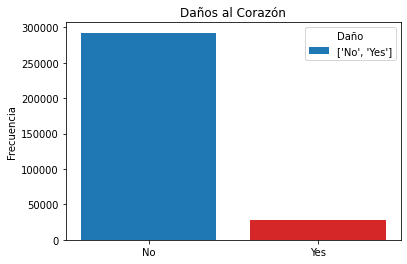

In [9]:
fig, ax = plt.subplots()
# Colores
bar_labels = ['No', 'Yes']
bar_colors = ['tab:blue', 'tab:red']

#frecuencia['frecuencia'].plot(kind="bar")
ax.bar(frecuencia['HeartDisease'], frecuencia['frecuencia'], label=bar_labels, color=bar_colors)

ax.set_ylabel('Frecuencia')
ax.set_title('Daños al Corazón')
ax.legend(title='Daño')

plt.show()

#### 4.3.1.2 Histogramas de datos numéricos
Histograma únicamente de las variables numéricas del conjunto de datos ‘BMI’, ‘PhysicalHealth’, ‘MentalHealth’, ‘SleepTime’.

array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

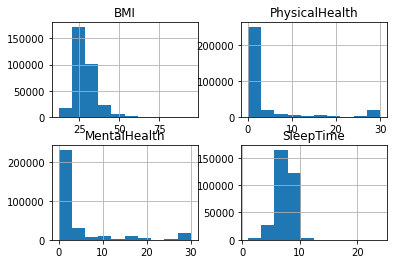

In [10]:
datos[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].hist()

## 4.4 Transformar datos
Crear variable llamada HeartDisease01 que se utilizará en el modelo de Regresión Logística tendrá valores 0 de para ‘No’ daño y 1 para si hay daño (‘Yes’).

In [11]:
datos['HeartDisease01'] = np.where(datos ['HeartDisease']== "Yes", 1, 0)

Quitar la variable HeartDisease que ya tiene variable transformada a HeartDisease01

In [12]:
datos = datos.drop("HeartDisease", axis='columns')

Quedaron las columnas:

In [13]:
datos.columns.values

array(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'HeartDisease01'], dtype=object)

### 4.4.1 Las variables de interés
Todas las variables de entrada o variables independientes:

“BMI”: Indice de masa corporal con valores entre 12.02 y 94.85.

“Smoking”: Si la persona es fumadora o no con valores categóritos de ‘Yes’ o ‘No’.

“AlcoholDrinking” : Si consume alcohol o no, con valores categóricos de ‘Yes’ o ‘No’.

“Stroke”: Si padece alguna anomalía cerebrovascular, apoplejia o algo similar, con valores categóricos de ‘Yes’ o ‘No’.

“PhysicalHealth” Estado físico en lo general con valores entre 0 y 30.

“MentalHealth”. Estado mental en lo general con valores entre 0 y 30.

“DiffWalking” . Que si se le dificulta caminar o tiene algún padecimiento al caminar, con valores categóritoc de ‘Yes’ o ‘No’.

“Sex”: Género de la persona, con valores de ‘Female’ y ‘Male’ para distinguir al género femenino y masculino respectivamente.

“AgeCategory”: Una clasificación de la edad de la persona de entre 18 y 80 años. La primera categoría con un rango de edad entre 18-24, a partir de 25 con rangos de 5 en 5 hasta la clase de 75-80 y una última categoría mayores de 80 años.

“Race”. Raza u origen de la persona con valores categóricos de ‘American Indian/Alaskan Native’, ’Asian’,’Black’, ’Hispanic’, ’Other’ y’White’.

“Diabetic”. Si padece o ha padecido de diabetes en cuatro condiciones siendo Yes y No para si o no: ‘No’, ‘borderline diabetes’ condición antes de detectarse diabetes tipo 2, ‘Yes’, y ‘Yes (during pregnancy)’ durante embarazo.

“PhysicalActivity” que si realiza actividad física, con valores categóricos de ‘Yes’ o ‘No’.

“GenHealth”: EStado general de salud de la persona con valores categóricos de ‘Excellent’, ‘Very good’, ‘Good’, ‘Fair’ y ‘Poor’ con significado en español de excelente, muy buena, buena, regular y pobre o deficiente.

“SleepTime”: valor numérico de las horas de sueño u horas que duerme la persona con valores en un rango entre 1 y 24.

“Asthma”: si padece de asma o no, con valores categóricos de ‘Yes’ o ‘No’.

“KidneyDisease”: si tiene algún padecimiento en los riñones, con valores categóricos de ‘Yes’ o ‘No’.

“SkinCancer”: si padece algún tipo de cáncer de piel, con valores categóricos de ‘Yes’ o ‘No’.

La variable de interés como dependiente o variable de salida es la de daño al corazón (HeartDisease), con valores categóricos de ‘Yes’ o ‘No’ , ahora la variable HeartDisease01 con valores ‘1’ o ‘0’.

Nuevamente la descripción de variables y ahora son 319795 observaciones y 18 variables

In [14]:
print("Observaciones y variables: ", datos.shape)

Observaciones y variables:  (319795, 18)


In [15]:
print("Columnas y tipo de dato")
datos.columns

Columnas y tipo de dato


Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease01'],
      dtype='object')

In [16]:
datos.dtypes

BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
HeartDisease01        int32
dtype: object

Para construir el modelo, se requiere variables de tipo numérica, aún se tienen en las variables independiente variables de tipo categóricas u object en Python:

Las variables que son categóricas: ‘Smoking’, ‘AlcoholDrinking’, ‘Stroke’, ‘DiffWalking’, ‘Sex’, ‘AgeCategory’, ‘Race’, ‘Diabetic’, ‘PhysicalActivity’, ‘GenHealth’, ‘Asthma’, ‘KidneyDisease’, ‘SkinCancer’.

Con estas variables, crear variables Dummys y construir un conjunto de datos que incluye las variable dummis.

El método de la librería de Pandas llamado get_dummies() convierte los datos categóricos en variables indicadoras o ficticias.

In [17]:
datos_dummis = pd.get_dummies(datos, drop_first = True)
datos_dummis

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease01,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Asi queda el conjunto de datos preparado llamado datos_dummis



In [18]:
datos_dummis.dtypes

BMI                                 float64
PhysicalHealth                      float64
MentalHealth                        float64
SleepTime                           float64
HeartDisease01                        int32
Smoking_Yes                           uint8
AlcoholDrinking_Yes                   uint8
Stroke_Yes                            uint8
DiffWalking_Yes                       uint8
Sex_Male                              uint8
AgeCategory_25-29                     uint8
AgeCategory_30-34                     uint8
AgeCategory_35-39                     uint8
AgeCategory_40-44                     uint8
AgeCategory_45-49                     uint8
AgeCategory_50-54                     uint8
AgeCategory_55-59                     uint8
AgeCategory_60-64                     uint8
AgeCategory_65-69                     uint8
AgeCategory_70-74                     uint8
AgeCategory_75-79                     uint8
AgeCategory_80 or older               uint8
Race_Asian                      

## 4.5 Datos de entrenamiento y validación
Datos de entrenamiento al 80% de los datos y 20% los datos de validación. Semilla 2022

In [40]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos_dummis.drop(columns = "HeartDisease01"), datos_dummis['HeartDisease01'],train_size = 0.80,  random_state = 1550)

### 4.5.1 Datos de entrenamiento
Se crea un conjunto de datos de validación con 255836 registros y 37 variables.

In [41]:
X_entrena

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
159791,28.72,0.0,0.0,8.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
138653,35.43,30.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
240854,28.06,0.0,0.0,7.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
148806,25.10,0.0,2.0,6.0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
215296,24.39,0.0,5.0,5.0,1,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152847,30.29,15.0,0.0,7.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
199093,20.34,0.0,5.0,7.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
290441,21.30,0.0,0.0,7.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
187929,30.90,0.0,15.0,8.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


### 4.5.2 Datos de validación
Se crea un conjunto de datos de validación con 63959 registros y 37 variables.

In [42]:
X_valida

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
135405,32.55,0.0,0.0,6.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
37902,33.36,0.0,0.0,7.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
273260,19.58,0.0,3.0,6.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
276747,22.24,20.0,20.0,5.0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
17367,28.06,0.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181967,37.71,0.0,0.0,6.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
263494,28.32,4.0,0.0,8.0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
174935,35.44,2.0,0.0,6.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
239431,24.96,0.0,0.0,8.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## 4.6 Modelos Supervisados de Arbol de Clasificación
## 4.6.1 Creación del modelo
Se crea el modelo de árbol de clasificación con datos de entrenamiento

In [43]:
modelo_ac = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 2022
          )

In [44]:
modelo_ac.fit(X_entrena, Y_entrena)

DecisionTreeClassifier(max_depth=5, random_state=2022)

### 4.6.2 Visualización del árbol


Profundidad del árbol: 5


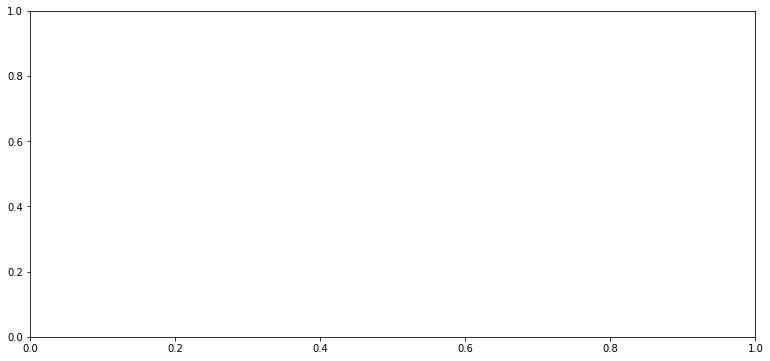

In [45]:
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo_ac.get_depth()}")

In [46]:
print(f"Número de nodos terminales: {modelo_ac.get_n_leaves()}")

Número de nodos terminales: 32


In [47]:
plot = plot_tree(
            decision_tree = modelo_ac,
            #feature_names = modelo_ac.tolist(),
            class_names   = 'Daño al corazón',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

### 4.6.3 Reglas de asociación para la construcción del árbol

In [48]:
texto_modelo = export_text(
                    decision_tree = modelo_ac,
                    feature_names = list(datos_dummis.drop(columns = "HeartDisease01").columns)
               )
print(texto_modelo)

|--- DiffWalking_Yes <= 0.50
|   |--- Stroke_Yes <= 0.50
|   |   |--- Diabetic_Yes <= 0.50
|   |   |   |--- AgeCategory_80 or older <= 0.50
|   |   |   |   |--- AgeCategory_75-79 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AgeCategory_75-79 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- AgeCategory_80 or older >  0.50
|   |   |   |   |--- Sex_Male <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Sex_Male >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- Diabetic_Yes >  0.50
|   |   |   |--- Sex_Male <= 0.50
|   |   |   |   |--- KidneyDisease_Yes <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- KidneyDisease_Yes >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Sex_Male >  0.50
|   |   |   |   |--- Smoking_Yes <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Smoking_Yes >  0.50
|   |   |   |   |   |--- class: 0
|   |--- Stroke_Yes >  0.50
|   |   |--- GenHealth_Very good <= 0.50
|   |   |   |--- GenHe

## 4.7 Predicciones
Se construyen predicciones con los datos de validación.

In [49]:
predicciones = modelo_ac.predict(X_valida)
print(predicciones)

[0 0 0 ... 0 0 0]


### 4.7.1 Tabla comparativa

In [58]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(HeartDisease_Real = Y_valida)
comparaciones = comparaciones.assign(HeartDisease_Pred = predicciones.flatten().tolist())
print(comparaciones)

          BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_Yes  \
135405  32.55             0.0           0.0        6.0            0   
37902   33.36             0.0           0.0        7.0            0   
273260  19.58             0.0           3.0        6.0            0   
276747  22.24            20.0          20.0        5.0            0   
17367   28.06             0.0           0.0        8.0            0   
...       ...             ...           ...        ...          ...   
181967  37.71             0.0           0.0        6.0            0   
263494  28.32             4.0           0.0        8.0            1   
174935  35.44             2.0           0.0        6.0            0   
239431  24.96             0.0           0.0        8.0            0   
309753  20.60            30.0           0.0        7.0            1   

        AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
135405                    0           0                0         1   
37902  

### 4.7.2 Evaluación del modelo
Se evalúa el modelo con la matriz de confusión

#### 4.7.2.1 Matriz de confusión

In [59]:
print(confusion_matrix(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))

[[58323   148]
 [ 5280   208]]


In [52]:
matriz = confusion_matrix(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred'])

#### 4.7.2.2 ¿A cuantos le atina el modelo?

In [60]:
print(classification_report(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58471
           1       0.58      0.04      0.07      5488

    accuracy                           0.92     63959
   macro avg       0.75      0.52      0.51     63959
weighted avg       0.89      0.92      0.88     63959



In [61]:
accuracy = accuracy_score(
    y_true = comparaciones['HeartDisease_Real'],
    y_pred = comparaciones['HeartDisease_Pred'],
    normalize = True
    )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 91.51331321627919 %


## 4.8 Prediccions con un registro nuevo
Se crea un registro de una persona con ciertas condiciones de salud a partir de un diccionario.



In [62]:
# Se crea un diccionario
registro = {'BMI': 38, 'PhysicalHealth': 2, 'MentalHealth': 5, 'SleepTime' : 12, 'Smoking_Yes' : 1, 'AlcoholDrinking_Yes' : 1, 'Stroke_Yes' : 1, 'DiffWalking_Yes': 1, 'Sex_Male': 1, 
'AgeCategory_25-29' : 0, 'AgeCategory_30-34' : 0, 
'AgeCategory_35-39' : 0, 'AgeCategory_40-44' : 0, 
'AgeCategory_45-49' : 0, 'AgeCategory_50-54' : 0,
'AgeCategory_55-59' : 0, 'AgeCategory_60-64' : 0,
'AgeCategory_65-69' : 0, 'AgeCategory_70-74': 1, 
'AgeCategory_75-79' : 0, 'AgeCategory_80 or older' : 0,         'Race_Asian' : 0, 'Race_Black' : 1, 'Race_Hispanic' : 0,
'Race_Other' : 0, 'Race_White' : 0,
'Diabetic_No, borderline diabetes' : 0, 'Diabetic_Yes' : 1,
'Diabetic_Yes (during pregnancy)' : 0, 
'PhysicalActivity_Yes' : 0, 'GenHealth_Fair' : 1, 
'GenHealth_Good' : 0, 'GenHealth_Poor' : 0, 
'GenHealth_Very good' : 0, 'Asthma_Yes' : 1, 'KidneyDisease_Yes':1, 'SkinCancer_Yes': 0}
persona = pd.DataFrame()
persona = persona.append(registro, ignore_index=True)

C:\Users\katod\AppData\Local\Temp\ipykernel_28228\2129722151.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  persona = persona.append(registro, ignore_index=True)


In [63]:
persona

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,38,2,5,12,1,1,1,1,1,0,...,1,0,0,1,0,0,0,1,1,0


Se hace la predicción en términos de clasificación de la persona con estos valores para saber si tiene o no daño en el corazón:

In [64]:
prediccion = modelo_ac.predict(persona)
if (prediccion == 1):
    print("La persona tiene problemas de corazón")
else:
    print("La persona NO tiene problemas de corazón")

La persona tiene problemas de corazón


La predicción en términos de clasificación de la persona con las características proporcionadas es que está enfermo o tiene daño del corazón.

# 5 Interpretación
Se utilizará la semilla 1550 junto con una partición del 80/20 para los datos de entrenamiento y validación. 

Según la matriz de confusión, se tiene un índice de certeza del .9151, que en porcentajes sería un 91.51%, es decir, el modelo acierta aproximadamente 91 de cada 100 casos. También, según la matriz de confusión, se tiene un total de 58323 verdaderos positivos, 148 verdaeros negativos, 5280 falsos positivos y 208 falsos negativos.

Por último, el modelo predictivo determina que la persona del ejemplo, SI tiene problemas de corazón.